# Titanic

+ Veri setinin sutun içerikleri ile ilgili kısa bir bilgi verelim
* Survived:Hayatta kalma sonucu (0 = Hayır; 1 = Evet)
* Pclass: Sosyoekonomik sınıf (1 = Üst sınıf; 2 = Orta sınıf; 3 = Alt sınıf)
* Name: Yolcunun adı
* Sex: Yolcunun cinsiyeti
* Age: Yolcunun yaşı (Bazı girişler NaN içerir)
* SibSp: Yolcunun gemide bulunan kardeş ve eşlerinin sayısı
* Parch: Yolcunun gemide bulunan ebeveyn ve çocuklarının sayısı
* Ticket: Yolcunun bilet numarası
* Fare:  Yolcu tarafından ödenen ücret
* Cabin: Yolcunun kabin numarası (Bazı girişler NaN içerir)
* Embarked: Yolcunun bindiği liman (C = Cherbourg; Q = Queenstown; S = Southampton)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [86]:
data = pd.read_csv('dataset/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
#sütün biliglerine bakalim
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
#bazi boş sütünlar var bunlardaki NaN değer sayısına bakalım
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
#cabin değerlerinnin yaklaşık %80 'i boş bu yüzden bu sütünü silelim ki daha temiz bir verimiz olsun
data = data.drop('Cabin',axis=1)
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [90]:
#yaklaşık %10 luk bir age boşluğu var burayıda ortalama ile dolduralım
data['Age'].fillna(data['Age'].mean(),inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [91]:
#embarked sutununda sadece iki tane boş değer var bu yüzden ençok tekrar edilen değerle doldurucağız
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [92]:
#mode() ile mod değerini alıyor 0 ise modun indexsini veriyor
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [93]:
#Veri setimizde artık boş yer kalmadı 
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Grafikler

In [94]:
#kadın ve erkek yolcuların pasta grafiğine göre oranı
gender = data.groupby(["Sex"]).size().reset_index(name='Count')
gender

,Sex,Count
0,female,314
1,male,577


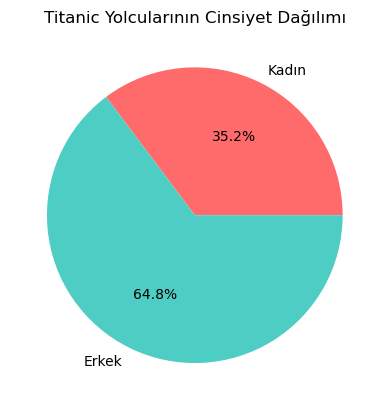

In [95]:
#grafiği bu şekilde
#plt.pie(gender['Count'],labels=['Kadın', 'Erkek']) 
plt.pie(gender['Count'],autopct='%1.1f%%',labels=['Kadın', 'Erkek'],colors=['#FF6B6B', '#4ECDC4'])   
plt.title('Titanic Yolcularının Cinsiyet Dağılımı')
plt.show()    

In [96]:
#Şehirlere göre binen yolcuların cinsiyetleri sutun grafiği
city_gender = data.groupby(['Embarked', 'Sex']).size().reset_index(name='count')
#size her birinde kaç tane yolcu olduğunu tutuyor.
city_gender

,Embarked,Sex,count
0,C,female,73
1,C,male,95
2,Q,female,36
3,Q,male,41
4,S,female,205
5,S,male,441


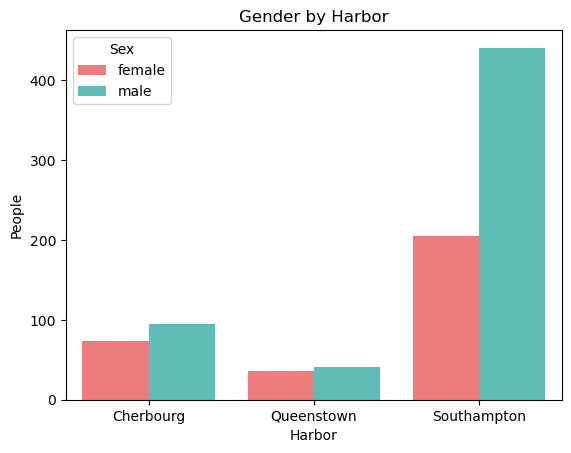

In [97]:
# Grafiği bu şekilde
sns.barplot(x="Embarked",y="count",data=city_gender,hue="Sex", palette=['#FF6B6B', '#4ECDC4']) #palette ile palet belirtiyoruz
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'],rotation=0) # sutun isimlerini değiştirdik 
plt.xlabel("Harbor")
plt.ylabel("People")
plt.title("Gender by Harbor")
plt.show()


In [98]:
#Her classtaki yolcuların bilgisi
class_gender = data.groupby(['Pclass', 'Sex']).size().reset_index(name='count')
class_gender

,Pclass,Sex,count
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


Text(0.5, 1.0, 'Gender by Class')

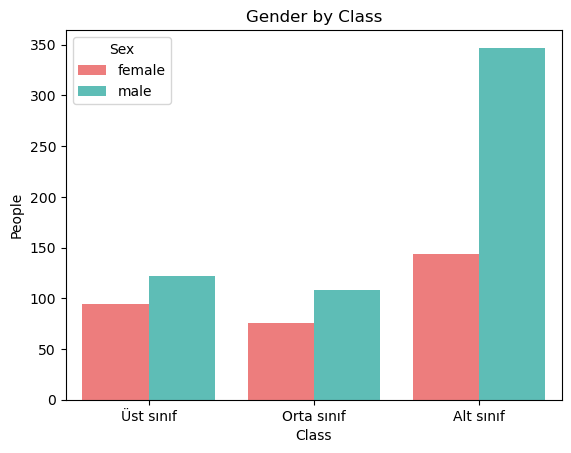

In [99]:
# Grafiği bu şekilde
ax=sns.barplot(x="Pclass",y="count",data=class_gender,hue="Sex", palette=['#FF6B6B', '#4ECDC4']) #palette ile palet belirtiyoruz
ax.set_xticklabels(['Üst sınıf', 'Orta sınıf', 'Alt sınıf'])
plt.xlabel("Class")
plt.ylabel("People")
plt.title("Gender by Class")


In [100]:
#Class a göre hayatta kalma oranı
survival_rates = data.groupby('Pclass')['Survived'].mean() * 100
survival_rates = survival_rates.reset_index() 
survival_rates

,Pclass,Survived
0,1,62.962963
1,2,47.282609
2,3,24.236253


Text(0.5, 1.0, 'Sınıfa göre hatta kalma oranı(%)')

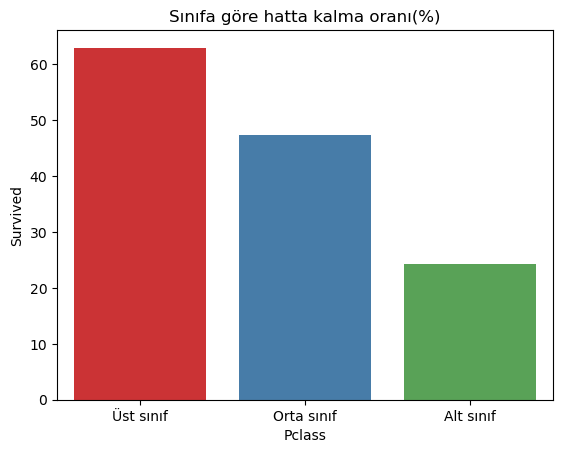

In [101]:
#grafiği şu şekilde 
ax=sns.barplot(x="Pclass",y="Survived",data=survival_rates,palette="Set1")
ax.set_xticklabels(['Üst sınıf', 'Orta sınıf', 'Alt sınıf'])
plt.title("Sınıfa göre hatta kalma oranı(%)")

In [102]:
#Biniş limanına göre hayatta kalma oranı
harbor_survived=data.groupby("Embarked")["Survived"].mean()*100
harbor_survived=harbor_survived.reset_index()
harbor_survived

,Embarked,Survived
0,C,55.357143
1,Q,38.961039
2,S,33.900929


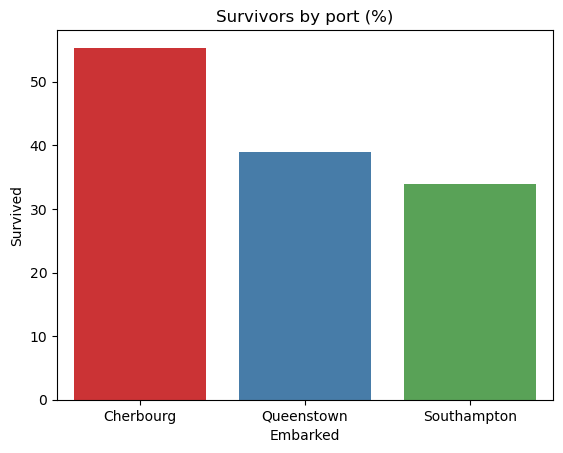

In [103]:
#grafiği şu şekilde 
sns.barplot(x="Embarked",y="Survived",data=harbor_survived,palette="Set1")
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'],rotation=0)
plt.title("Survivors by port (%)")
plt.show()

In [104]:
#Ücret ile hayatta kalma yüzdesi
fare_survival = data.groupby("Survived")["Fare"].mean()
fare_survival

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [105]:
# Fare’i 4 eşit gruba ayıralım
data["Fare_bin"] = pd.qcut(data["Fare"], 4, labels=["Düşük", "Orta", "Yüksek", "Çok Yüksek"])

# Her grup için hayatta kalma yüzdesi
fare_survival_rate = data.groupby("Fare_bin")["Survived"].mean() * 100
print(fare_survival_rate)


Fare_bin
Düşük         19.730942
Orta          30.357143
Yüksek        45.495495
Çok Yüksek    58.108108
Name: Survived, dtype: float64


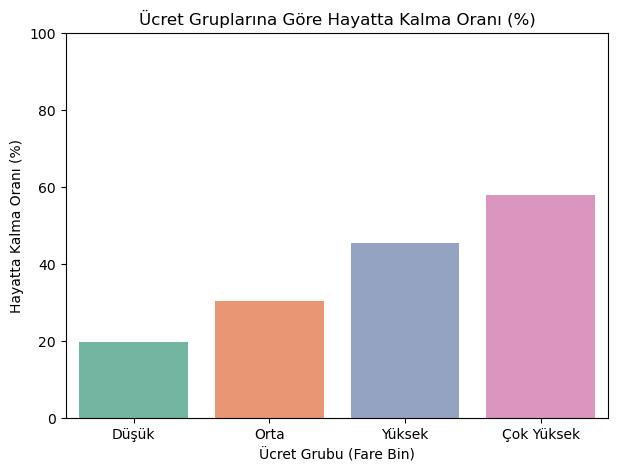

In [106]:
plt.figure(figsize=(7,5))
sns.barplot(
    x=fare_survival_rate.index,
    y=fare_survival_rate.values,
    palette="Set2"
)

plt.title("Ücret Gruplarına Göre Hayatta Kalma Oranı (%)")
plt.ylabel("Hayatta Kalma Oranı (%)")
plt.xlabel("Ücret Grubu (Fare Bin)")
plt.ylim(0, 100)  
plt.show()
